METRIC LEARNING:

Many machine learning algorithms need a similarity measure to carry out their tasks. Usually, standard distances, like euclidean distance, are used to measure this similarity. Distance Metric Learning algorithms try to learn an optimal distance from the data. Metric learning helps to depict the relationships between data by placing the dissimilar data points far 
from each other and the similar ones closer to each other. 

The distant metric learning can be broadly classified as follows:
    1. Fully Supervised 
    2. Weakly Supervised
    3. Semi Supervised 
    



In [1]:
%matplotlib inline


import metric_learn
import numpy as np
from sklearn.datasets import load_iris

# visualisation imports
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#using only 2 features i.e. sepal_width, sepal_length of iris datasets
iris_data = load_iris()
X = iris_data['data']
Y = iris_data['target']
def plot(X, Y, i, j, label1, label2):
    x_min, x_max = X[:, i].min() - .5, X[:, i].max() + .5
    y_min, y_max = X[:, j].min() - .5, X[:, j].max() + .5
    plt.figure(2, figsize=(8, 6))

    # clean the figure
    plt.clf()

    plt.scatter(X[:, i], X[:, j], c=Y, cmap=plt.cm.Paired)
    plt.xlabel(label1)
    plt.ylabel(label2)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())

    plt.show()


1. Fully supervised:

        Supervised metric learning algorithms take as inputs points X and target labels y, and learn a distance matrix that make points from the same class (for classification) or with close target value (for regression) close to each other, and points from different classes or with distant target values far away from each other.
    
        The training data is mapped with a class label which is specified as a pairwise constraint as follows:
            i. equivalence constraint which specifies that given pair of data is similar and hence must be placed close together in learned metric.
            ii. inequivalence constraint which specifies that given pair of data is dissimilar and hence must be placed far in learned metric.
                        


    
    i. Large Margin Nearest Neighbour(LMNN):
            LMNN learns a Mahanalobis distance metric in the kNN classification setting using semidefinite programming. The learned metric attempts to keep k-nearest neighbors in the same class, while keeping examples from different classes separated by a large margin. This algorithm makes no assumptions about the distribution of the data.
    
Paper:- http://papers.nips.cc/paper/2795-distance-metric-learning-for-large-margin-nearest-neighbor-classification.pdf

/Users/sswetank/anaconda3/lib/python3.6/site-packages/metric_learn/lmnn.py:62: UserWarning: use_pca does nothing for the python_LMNN implementation
  warnings.warn('use_pca does nothing for the python_LMNN implementation')


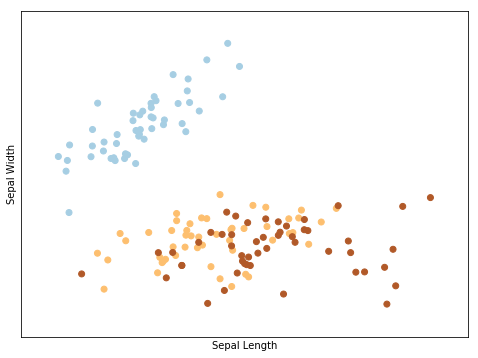

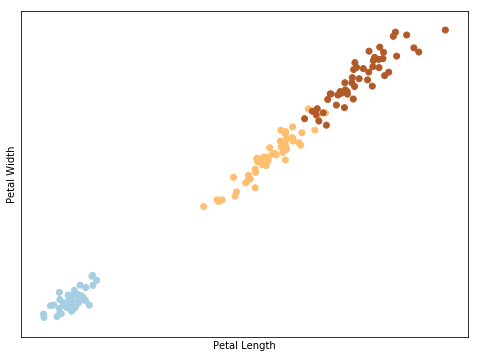

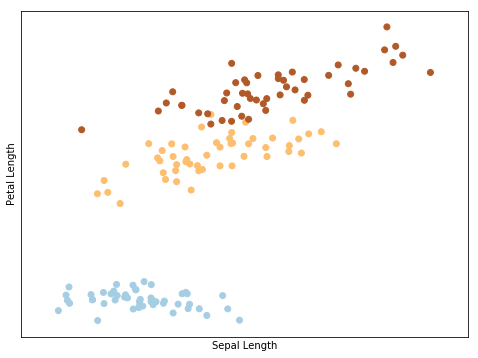

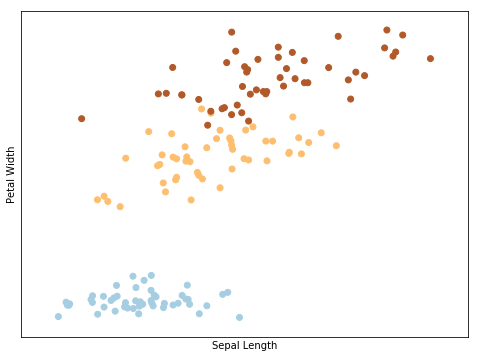

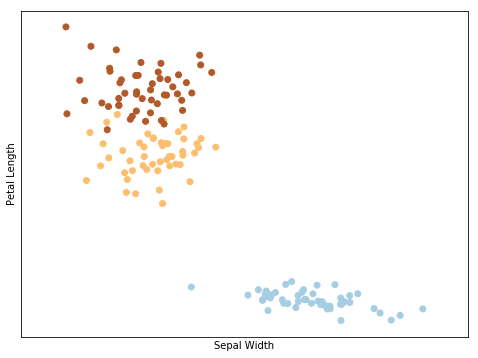

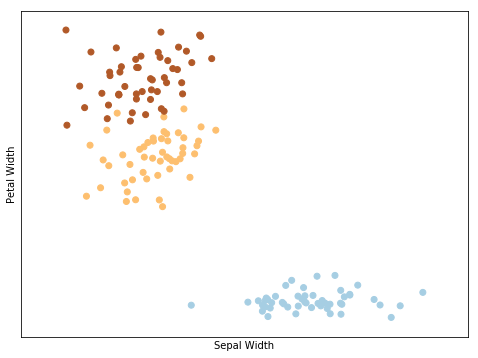

In [4]:
def metric_lmnn(X,Y):
    from metric_learn import LMNN
    lmnn = LMNN(k=5, learn_rate=1e-6)
    lmnn.fit(X, Y)
    X_lmnn = lmnn.transform()
    return X_lmnn

X_lmnn=metric_lmnn(X,Y)
plot(X_lmnn,Y,0,1,"Sepal Length", "Sepal Width")
plot(X_lmnn,Y,2,3,"Petal Length", "Petal Width")
plot(X_lmnn,Y,0,2,"Sepal Length", "Petal Length")
plot(X_lmnn,Y,0,3,"Sepal Length", "Petal Width")
plot(X_lmnn,Y,1,2,"Sepal Width", "Petal Length")
plot(X_lmnn,Y,1,3,"Sepal Width", "Petal Width")



ii. Neighborhood Component Analysis(NCA): 

       NCA uses stochastic gradient ascent for maximization. It can also learn a low-dimensional linear embedding 
       of labeled data that can be used for data visualizationand fast classification.

Paper:- http://www.cs.toronto.edu/~hinton/absps/nca.pdf

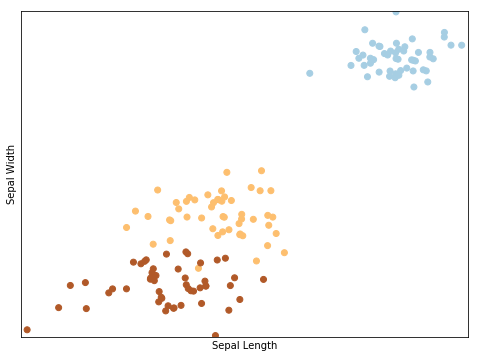

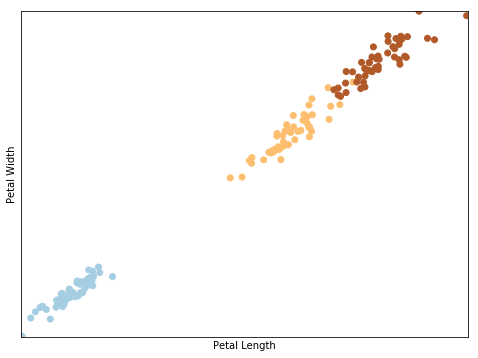

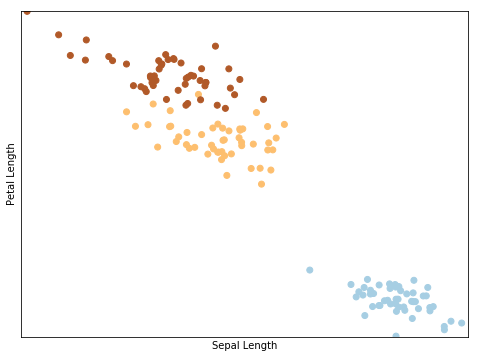

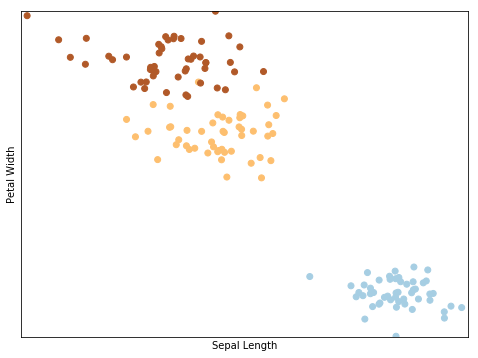

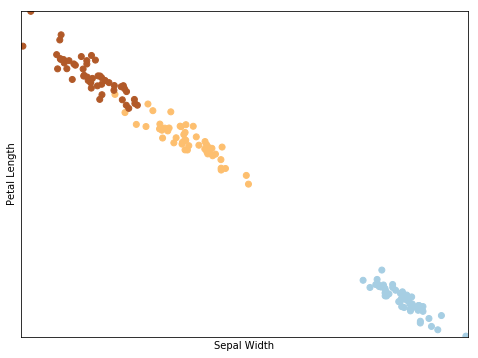

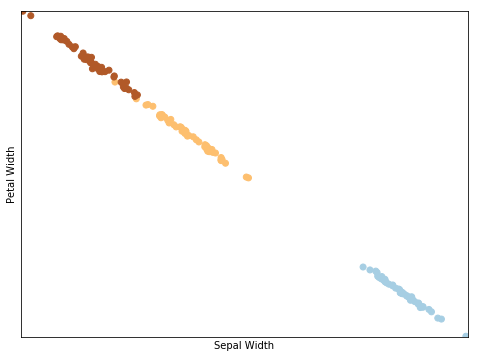

In [5]:
def metric_nca(X,Y):
    from metric_learn import NCA
    nca = NCA(max_iter=1000, learning_rate=0.01)
    nca.fit(X, Y)
    X_nca = nca.transform()
    return X_nca

X_nca=metric_nca(X,Y)
plot(X_nca,Y,0,1,"Sepal Length", "Sepal Width")
plot(X_nca,Y,2,3,"Petal Length", "Petal Width")
plot(X_nca,Y,0,2,"Sepal Length", "Petal Length")
plot(X_nca,Y,0,3,"Sepal Length", "Petal Width")
plot(X_nca,Y,1,2,"Sepal Width", "Petal Length")
plot(X_nca,Y,1,3,"Sepal Width", "Petal Width")


iii. Local Fisher Discriminant Analysis (LFDA):

          LFDA is a linear supervised dimensionality reduction method. It is particularly useful when dealing with multimodality, where one ore more classes consist of separate clusters in input space. The core optimization problem of LFDA is solved as a generalized eigenvalue problem.

Paper:- 
1. http://www.ms.k.u-tokyo.ac.jp/2007/LFDA.pdf
2. https://gastrograph.com/resources/whitepapers/local-fisher-discriminant-analysis-on-beer-style-clustering.html

/Users/sswetank/anaconda3/lib/python3.6/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1572: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  RuntimeWarning)


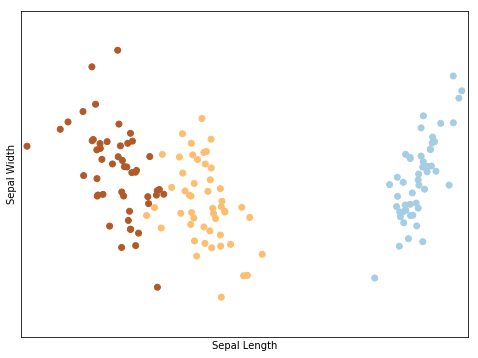

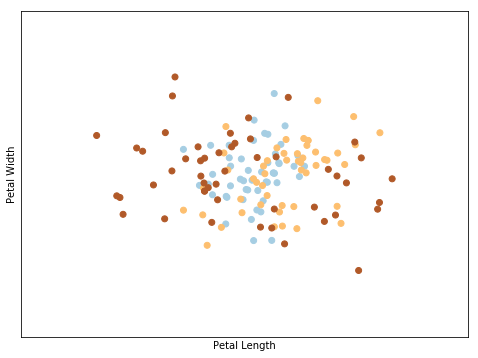

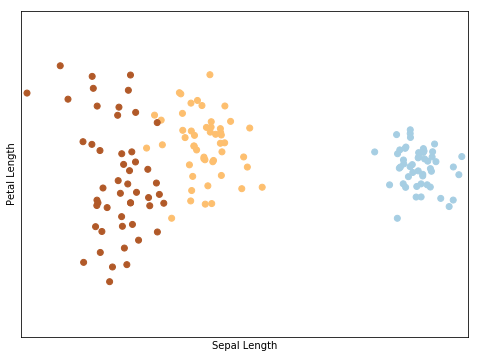

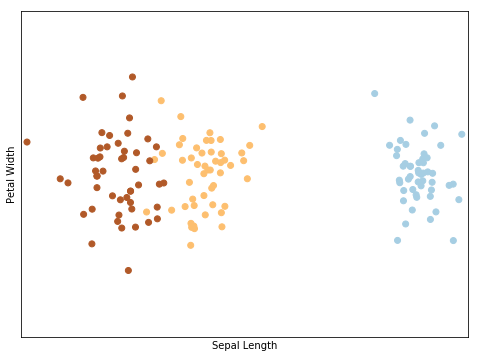

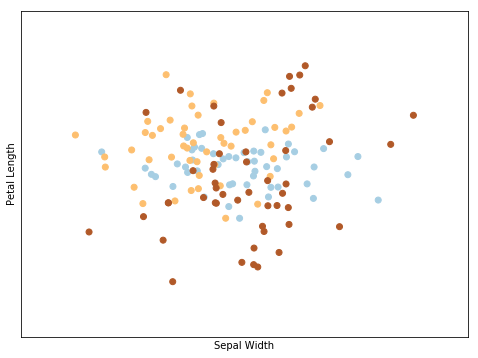

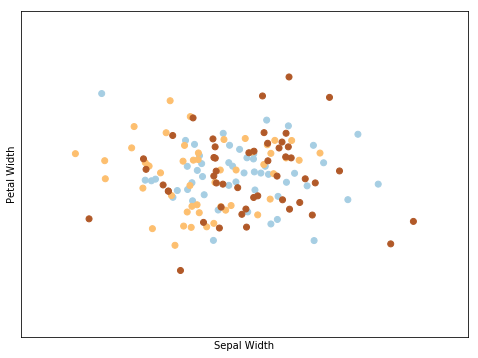

In [6]:
def metric_lfda(X,Y):
    from metric_learn import LFDA
    lfda = LFDA(k=2, num_dims=4)
    lfda.fit(X, Y)
    X_lfda = lfda.transform()
    return X_lfda

X_lfda=metric_lfda(X,Y)
plot(X_lfda,Y,0,1,"Sepal Length", "Sepal Width")
plot(X_lfda,Y,2,3,"Petal Length", "Petal Width")
plot(X_lfda,Y,0,2,"Sepal Length", "Petal Length")
plot(X_lfda,Y,0,3,"Sepal Length", "Petal Width")
plot(X_lfda,Y,1,2,"Sepal Width", "Petal Length")
plot(X_lfda,Y,1,3,"Sepal Width", "Petal Width")


iv. Metric Learning for Kernel Regression (MLKR):

        MLKR is an algorithm for supervised metric learning, which learns a distance function by directly minimising the leave-one-out regression error. This algorithm can also be viewed as a supervised variation of PCA and can be used for dimensionality reduction and high dimensional data visualization.
        
Paper:- http://proceedings.mlr.press/v2/weinberger07a/weinberger07a.pdf

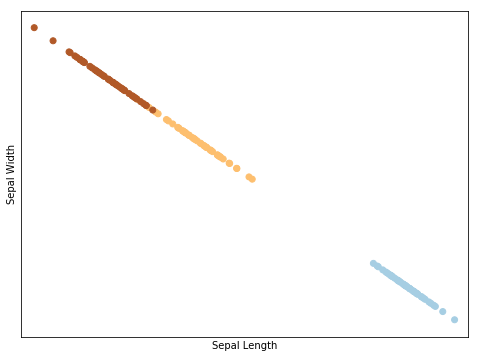

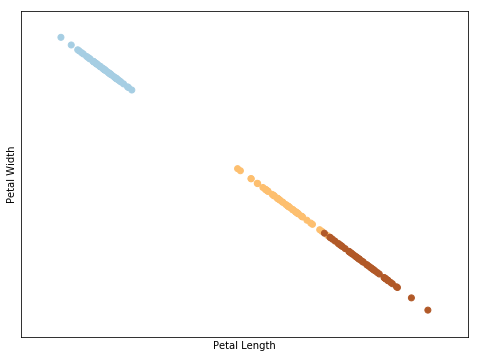

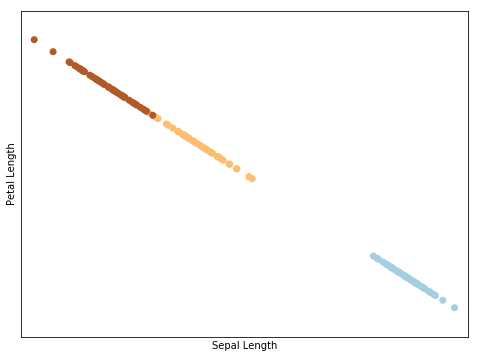

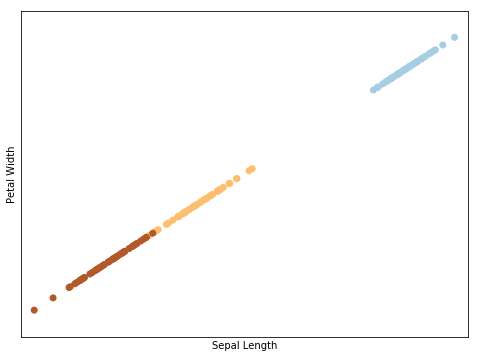

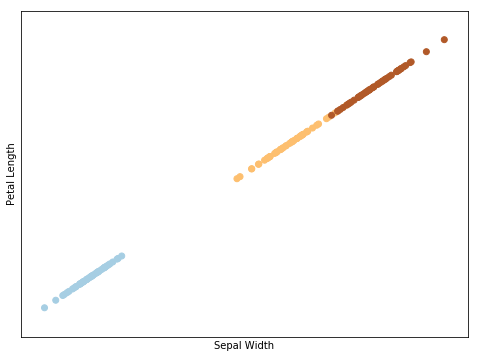

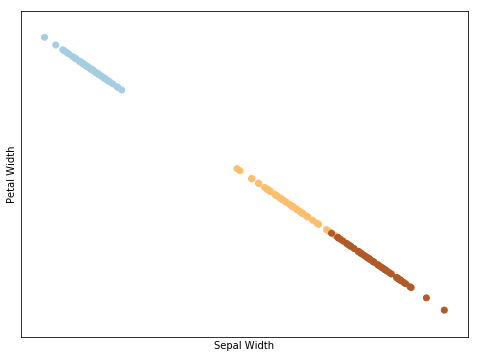

In [7]:
def metric_mlkr(X,Y):
    from metric_learn import MLKR
    mlkr = MLKR()
    mlkr.fit(X, Y)
    X_mlkr = mlkr.transform()
    return X_mlkr

X_mlkr=metric_mlkr(X,Y)
plot(X_mlkr,Y,0,1,"Sepal Length", "Sepal Width")
plot(X_mlkr,Y,2,3,"Petal Length", "Petal Width")
plot(X_mlkr,Y,0,2,"Sepal Length", "Petal Length")
plot(X_mlkr,Y,0,3,"Sepal Length", "Petal Width")
plot(X_mlkr,Y,1,2,"Sepal Width", "Petal Length")
plot(X_mlkr,Y,1,3,"Sepal Width", "Petal Width")


2. Weakly Supervised Algorithm:

    Weakly supervised algorithms work on weaker information about the data points than supervised algorithms. Rather than labeled points, they take as input similarity judgments on tuples of data points, for instance pairs of similar and dissimilar points

     i. Information-Theoretic Metric Learn:
    
            ITML minimizes the differential relative entropy between two multivariate Gaussians under constraints on the distance function, which can be formulated into a Bregman optimization problem by minimizing the LogDet divergence subject to linear constraints. This algorithm can handle a wide variety of constraints and can optionally incorporate a prior on the distance function. Unlike some other methods, ITML does not rely on an eigenvalue computation or semi-definite programming.
            
Paper:- http://www.cs.utexas.edu/users/pjain/pubs/metriclearning_icml.pdf
    
    

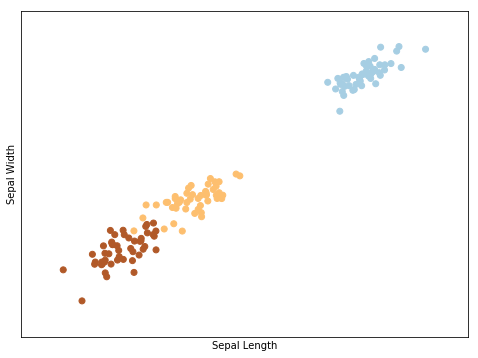

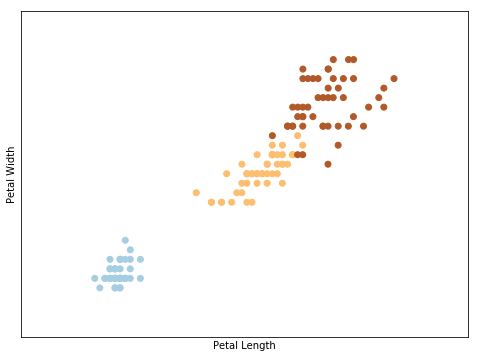

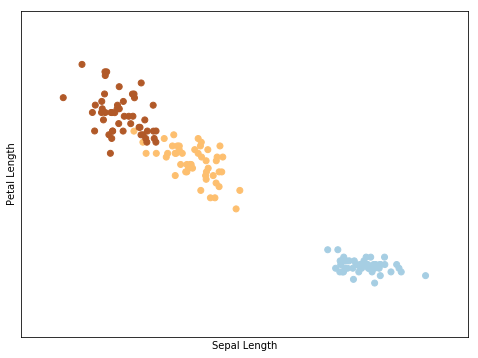

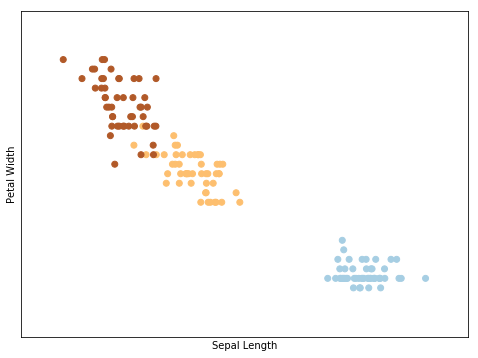

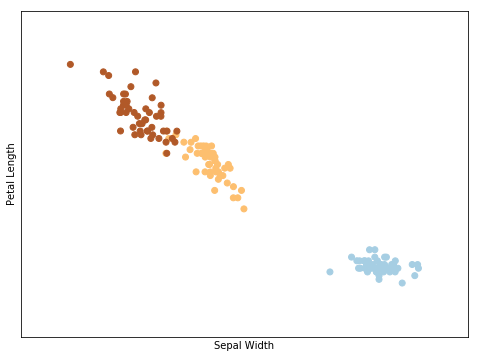

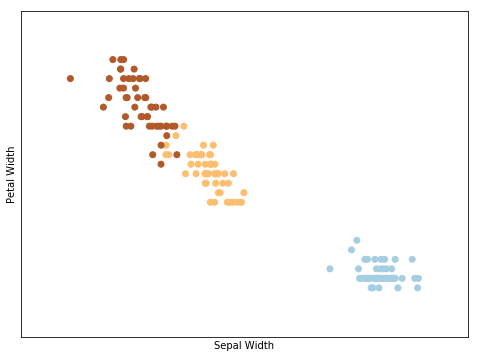

In [8]:
def metric_itml_sup(X,Y):
    from metric_learn import ITML_Supervised
    itml = ITML_Supervised(num_constraints=200)
    itml.fit(X,Y)
    X_itml = itml.transform()
    return X_itml
X_itml=metric_itml_sup(X,Y)
plot(X_itml,Y,0,1,"Sepal Length", "Sepal Width")
plot(X_itml,Y,2,3,"Petal Length", "Petal Width")
plot(X_itml,Y,0,2,"Sepal Length", "Petal Length")
plot(X_itml,Y,0,3,"Sepal Length", "Petal Width")
plot(X_itml,Y,1,2,"Sepal Width", "Petal Length")
plot(X_itml,Y,1,3,"Sepal Width", "Petal Width")


ii. Least Squares Metric Learn (LSML):

        LSML algoritm minimizes a convex objective functioncorresponding to the sum of squared residuals of constraints.
        
Paper:- http://web.cs.ucla.edu/~weiwang/paper/ICDM12.pdf

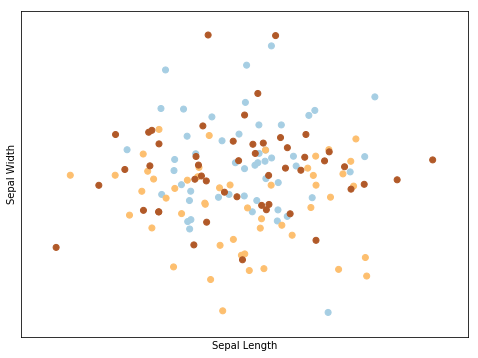

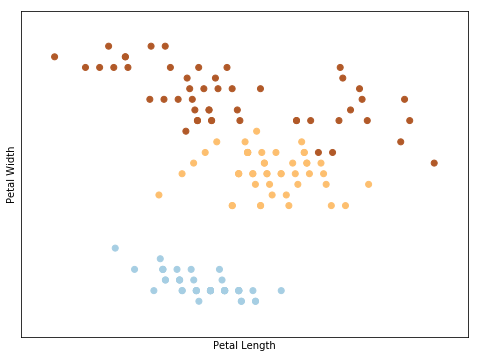

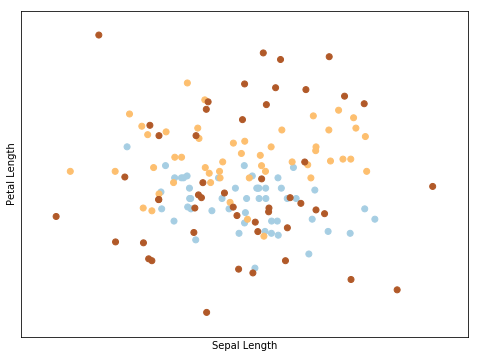

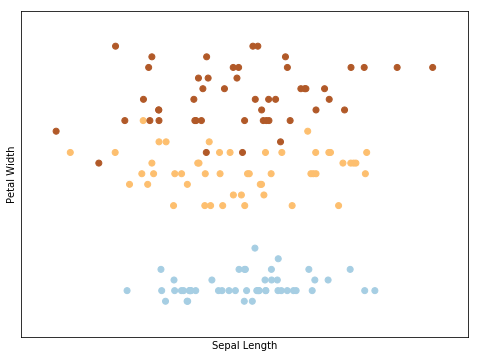

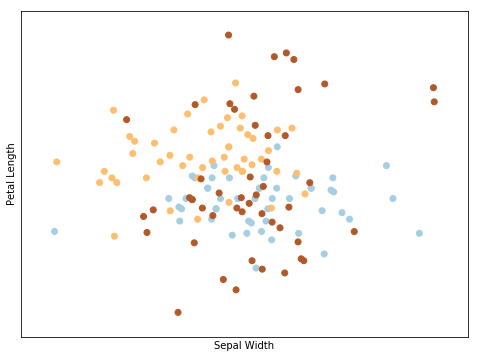

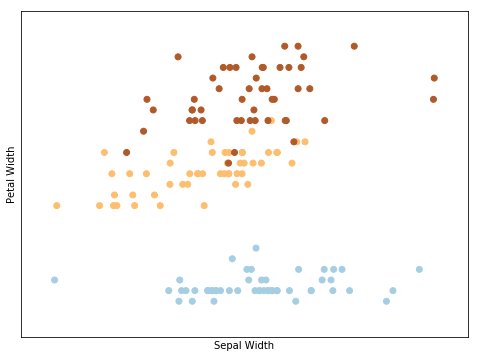

In [9]:
def metric_lsml_sup(X,Y):
    from metric_learn import LSML_Supervised
    lsml = LSML_Supervised(num_constraints=200)
    lsml.fit(X, Y)
    X_lsml = lsml.transform()
    return X_lsml
X_lsml=metric_lsml_sup(X,Y)
plot(X_lsml,Y,0,1,"Sepal Length", "Sepal Width")
plot(X_lsml,Y,2,3,"Petal Length", "Petal Width")
plot(X_lsml,Y,0,2,"Sepal Length", "Petal Length")
plot(X_lsml,Y,0,3,"Sepal Length", "Petal Width")
plot(X_lsml,Y,1,2,"Sepal Width", "Petal Length")
plot(X_lsml,Y,1,3,"Sepal Width", "Petal Width")


iii. Sparse Determinant Metric Learn (SDML):

        An efficient sparse metric learning in high-dimensional space via l 1 -penalized log-determinant regularization.
        
Paper:- http://lms.comp.nus.edu.sg/sites/default/files/publication-attachments/icml09-guojun.pdf

/Users/sswetank/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function pinvh is deprecated; sklearn.utils.extmath.pinvh was deprecated in version 0.19 and will be removed in 0.21. Use scipy.linalg.pinvh instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sswetank/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function pinvh is deprecated; sklearn.utils.extmath.pinvh was deprecated in version 0.19 and will be removed in 0.21. Use scipy.linalg.pinvh instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sswetank/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function graph_lasso is deprecated; The 'graph_lasso' was renamed to 'graphical_lasso' in version 0.20 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)


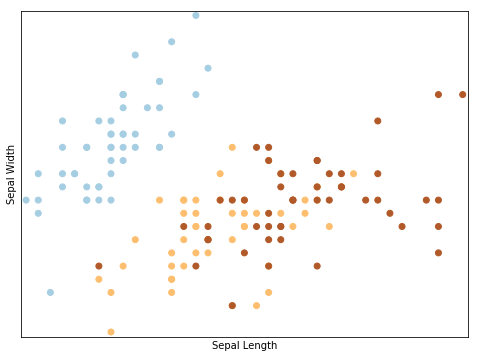

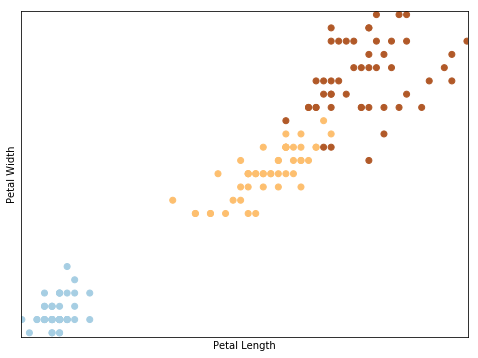

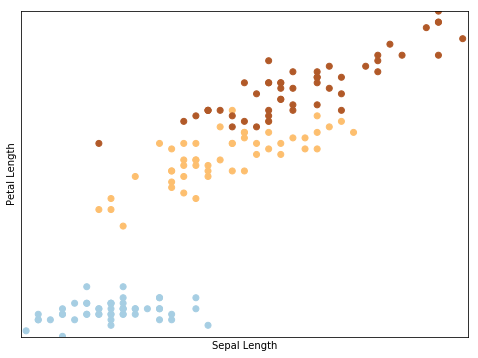

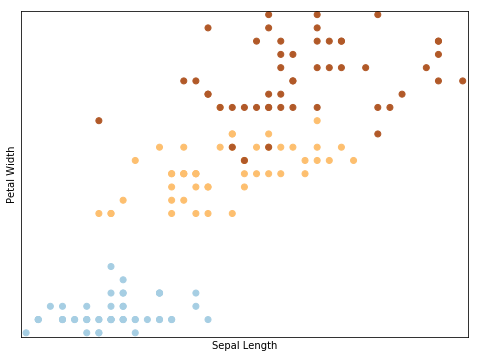

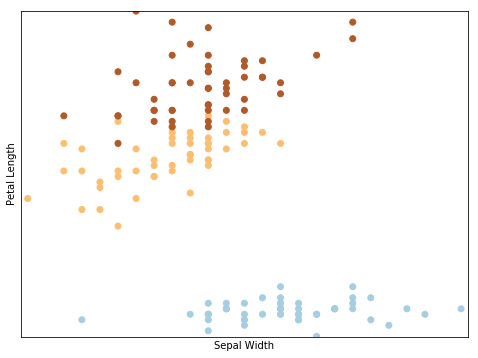

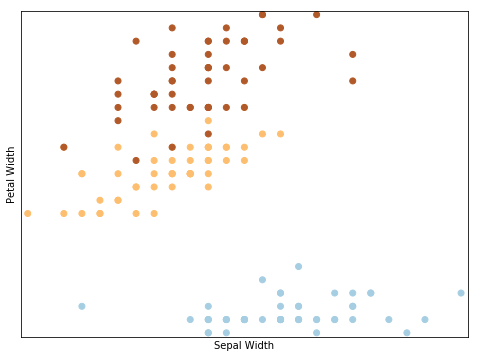

In [11]:
def metric_sdml_sup(X,Y):
    from metric_learn import SDML_Supervised
    sdml = SDML_Supervised(num_constraints=200)
    sdml.fit(X, Y)
    X_sdml = sdml.transform()
    return X_sdml
X_sdml=metric_sdml_sup(X,Y)
plot(X_sdml,Y,0,1,"Sepal Length", "Sepal Width")
plot(X_sdml,Y,2,3,"Petal Length", "Petal Width")
plot(X_sdml,Y,0,2,"Sepal Length", "Petal Length")
plot(X_sdml,Y,0,3,"Sepal Length", "Petal Width")
plot(X_sdml,Y,1,2,"Sepal Width", "Petal Length")
plot(X_sdml,Y,1,3,"Sepal Width", "Petal Width")


iv. Relative Component Anaysis (RCA):

        RCA learns a full rank Mahalanobis distance metric based on a weighted sum of in-class covariance matrices. It applies a global linear transformation to assign large weights to relevant dimensions and low weights to irrelevant dimensions. Those relevant dimensions are estimated using “chunklets”, subsets of points that are known to belong to the same class.
        
Paper:- http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.19.2871&rep=rep1&type=pdf
        

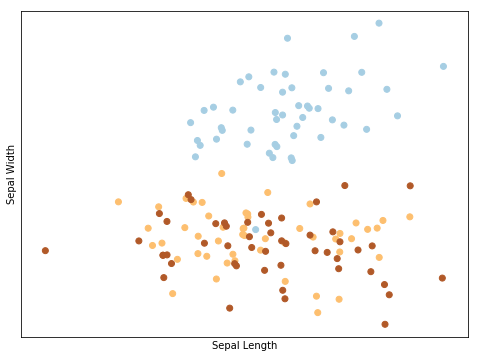

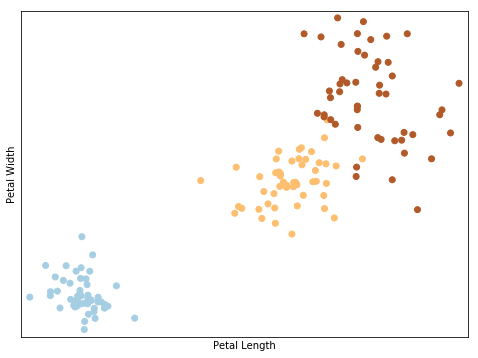

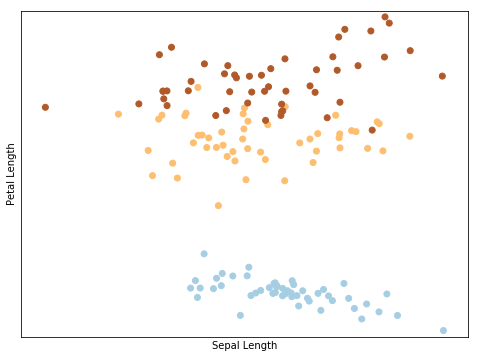

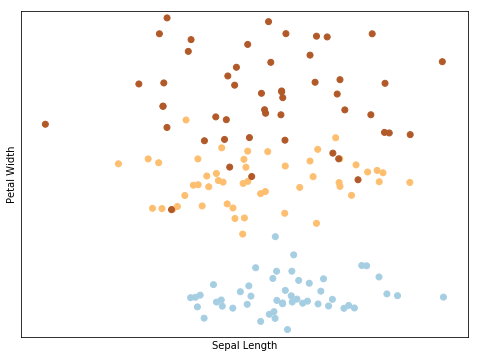

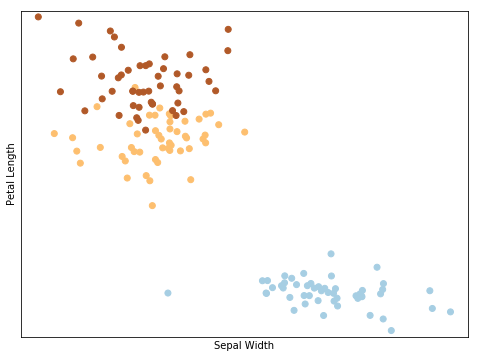

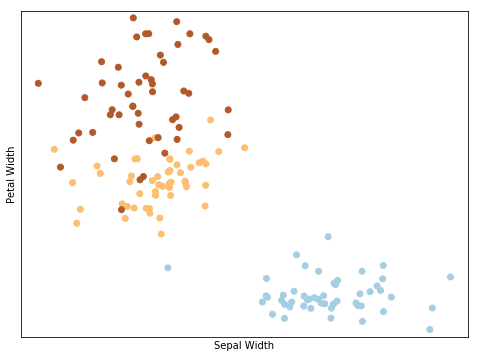

In [12]:
def metric_rca_sup(X,Y):
    from metric_learn import RCA_Supervised
    rca = RCA_Supervised(num_chunks=30, chunk_size=2)
    rca.fit(X, Y)
    X_rca = rca.transform()
    return X_rca
X_rca=metric_rca_sup(X,Y)
plot(X_rca,Y,0,1,"Sepal Length", "Sepal Width")
plot(X_rca,Y,2,3,"Petal Length", "Petal Width")
plot(X_rca,Y,0,2,"Sepal Length", "Petal Length")
plot(X_rca,Y,0,3,"Sepal Length", "Petal Width")
plot(X_rca,Y,1,2,"Sepal Width", "Petal Length")
plot(X_rca,Y,1,3,"Sepal Width", "Petal Width")


v. Mahalanobis Metric Learning for Clustering (MML):

        MMC minimizes the sum of squared distances between similar examples, while enforcing the sum of distances between dissimilar examples to be greater than a certain margin. This leads to a convex and, thus, local-minima-free optimization problem that can be solved efficiently. However, the algorithm involves the computation of eigenvalues, which is the main speed-bottleneck. Since it has initially been designed for clustering applications, one of the implicit assumptions of MMC is that all classes form a compact set, i.e., follow a unimodal distribution, which restricts the possible use-cases of this method. However, it is one of the earliest and a still often cited technique.

Paper:- http://papers.nips.cc/paper/2164-distance-metric-learning-with-application-to-clustering-with-side-information.pdf

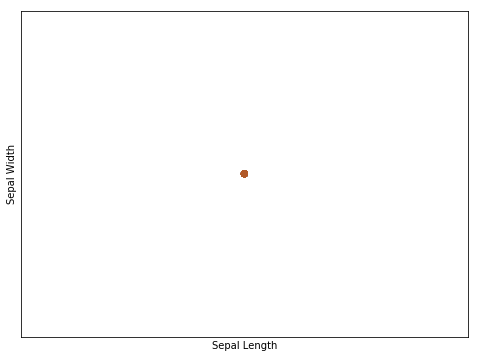

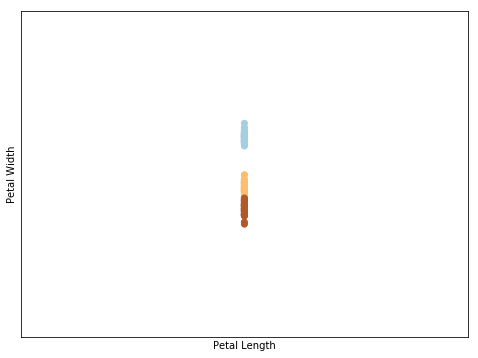

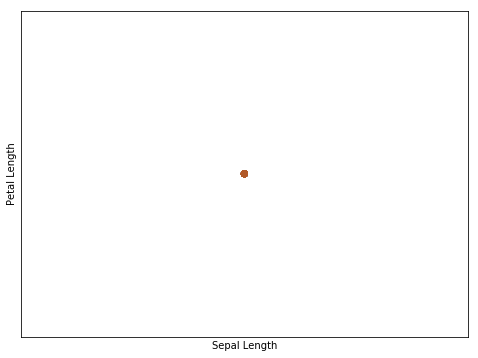

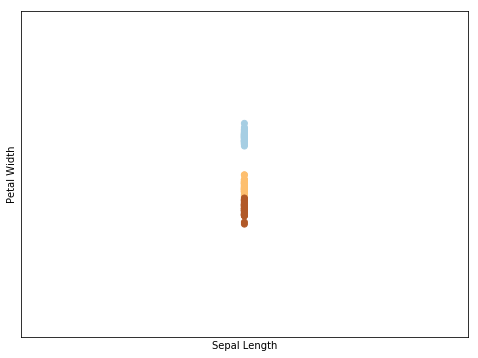

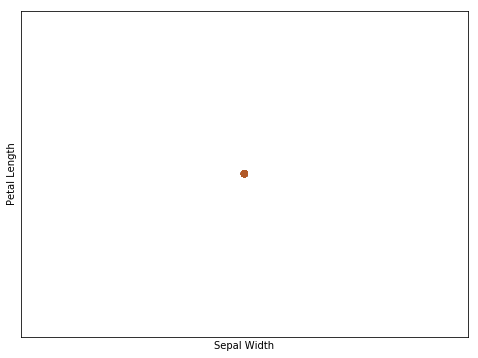

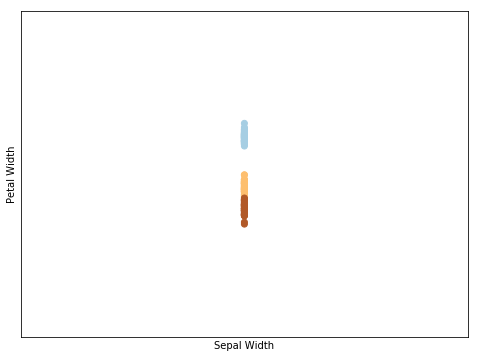

In [13]:
def metric_mmc_sup(X,Y):
    from metric_learn import MMC_Supervised
    mmc = MMC_Supervised(num_constraints=200)
    mmc.fit(X, Y)
    X_mmc = mmc.transform()
    return X_mmc
X_mmc=metric_mmc_sup(X,Y)
plot(X_mmc,Y,0,1,"Sepal Length", "Sepal Width")
plot(X_mmc,Y,2,3,"Petal Length", "Petal Width")
plot(X_mmc,Y,0,2,"Sepal Length", "Petal Length")
plot(X_mmc,Y,0,3,"Sepal Length", "Petal Width")
plot(X_mmc,Y,1,2,"Sepal Width", "Petal Length")
plot(X_mmc,Y,1,3,"Sepal Width", "Petal Width")
